##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [ ]:
%pip install -U -q 'google-genai>=1.0.0'

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GEMINI_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [ ]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash-lite-preview-09-2025", "gemini-2.5-flash", "gemini-2.5-flash-preview-09-2025", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [ ]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini model, a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [ ]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

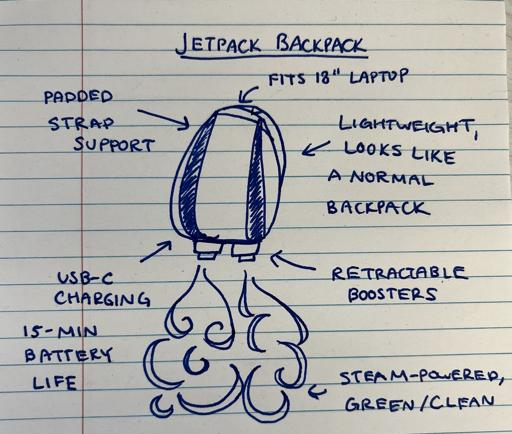

## Say Goodbye to Traffic Jams: The Jetpack Backpack is Here (Well, Almost)!

Tired of bumper-to-bumper traffic? Dreaming of a commute that's literally above it all? Get ready to ditch the bus pass and embrace the sky, because we just stumbled upon a concept that might revolutionize personal travel: The Jetpack Backpack!

This brilliant sketch outlines a "Jetpack Backpack" that, at first glance, looks... well, like a normal backpack! Designed for the modern commuter, it boasts **padded strap support** for comfort and, get this, it **fits an 18-inch laptop**. So yes, you can still bring your work with you, just... to a higher altitude. The idea is to be **lightweight** and blend in, making your superhero commute a discreet affair.

But the magic truly happens when you need to ascend. With **retractable boosters**, this clever contraption transforms from practical carry-all to personal aerial vehicle. And for the environmentally conscious among us, rejoice! It’s **steam-powered**, making it a "green/clean" way to navigate the skies. Plus, modern convenience isn't forgotten with **USB-C charging**.

Now, for the reality check: a **15-minute battery life** means you're not going cross-country just yet. But for those quick urban hops, bypassing gridlock, or making a grand entrance, it's more than enough.

This concept sketch blends sci-fi fantasy with everyday utility in a truly imaginative way. While still a dream, the "Jetpack Backpack" offers a glimpse into a future where personal flight is discreet, eco-friendly, and perhaps, just a backpack away.

What do you think? Would you trade your car keys for a jetpack strap?

In [ ]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/prompting-strategies#model-parameters).

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Woof woof! You! Yes, YOU! You have a *squeak*! A very important *squeak* you want to send to your friend, the fluffy cat, who lives far, far away!

**You have a Squeak!** (That's your message, your picture of a squirrel, your video of a bouncy ball!)
*Squeak!*

**Sending Your Squeak!**
You want to throw your *squeak*! But it's too far to throw! So, your *squeak* goes to a special box near your human. It's like a **Squeaky Toy Launcher**!
*WHIZZ! Squeak!*

**Invisible Paths!**
This **Squeaky Toy Launcher** sends your *squeak* onto invisible, wiggly, super-duper long paths! Paths that go under the grass! Paths that go over the trees! Paths that go all the way to the fluffy cat's house!
*Squeak-squeak-squeak-squeak!* (Imagine tiny squeaks zooming!)

**Giant Squeaky Toy Piles!**
Sometimes, your *squeak* doesn't go straight to the fluffy cat. Sometimes it goes to a **GIANT, GIANT pile of squeaky toys**! These are like the biggest squeaky toy closets in the world! When you want to see a picture of a squirrel, you're asking one of these *big squeaky toy piles* for *their* squirrel-squeak!
*WOOF! Squeak! (That's the squirrel picture popping up!)*

**Getting Squeaks Back!**
And when the fluffy cat sends *you* a *squeak* (maybe a video of a laser pointer!), it comes back on those same invisible paths! *Squeak! Squeak! Squeak!* Right to your **Squeaky Toy Launcher** box, and then to you!
*Wag wag! Pant pant!*

**Lots of Little Squeaks!**
It's not one big *WHOOSH-SQUEAK!* It's lots of little *squeaky-bits* that all travel together and then magically become one big *SQUEAKY THING* when they get to you!
*Sniff sniff! Squeak! Good boy!*

So, the internet is just **ALL THE SQUEAKS!** Going everywhere! All the time! *WOOF! Squeak!* Now, where's that ball?

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [ ]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say:

1.  "Oh, is *this* your big plan for me tonight, Universe? Real creative."
2.  "You know what, Universe? You're really starting to get on my last nerve with this kind of nonsense."

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [ ]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [ ]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Here's a function to check if a year is a leap year, provided in several common programming languages.

The rules for determining a leap year are:
1.  A year is a leap year if it is divisible by 4.
2.  However, if it is divisible by 100, it is NOT a leap year, unless...
3.  ...it is also divisible by 400, in which case it IS a leap year.

---

## Python

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    Args:
        year: The year to check (an integer).

    Returns:
        True if the year is a leap year, False otherwise.
    """
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    else:
        return False

# --- Examples ---
print(f"Is 2000 a leap year? {is_leap_year(2000)}") # Expected: True (divisible by 400)
print(f"Is 1900 a leap year? {is_leap_year(1900)}") # Expected: False (divisible by 100, but not by 400)
print(f"Is 2024 a leap year? {is_leap_year(2024)}") # Expected: True (divisible by 4, not by 100)
print(f"Is 2023 a leap year? {is_leap_year(2023)}") # Expected: False (not divisible by 4)
print(f"Is 1600 a leap year? {is_leap_year(1600)}") # Expected: True
```

---

## JavaScript

```javascript
/**
 * Checks if a given year is a leap year.
 * @param {number} year The year to check.
 * @returns {boolean} True if the year is a leap year, False otherwise.
 */
function isLeapYear(year) {
  if ((year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0)) {
    return true;
  } else {
    return false;
  }
}

// --- Examples ---
console.log(`Is 2000 a leap year? ${isLeapYear(2000)}`); // Expected: true
console.log(`Is 1900 a leap year? ${isLeapYear(1900)}`); // Expected: false
console.log(`Is 2024 a leap year? ${isLeapYear(2024)}`); // Expected: true
console.log(`Is 2023 a leap year? ${isLeapYear(2023)}`); // Expected: false
console.log(`Is 1600 a leap year? ${isLeapYear(1600)}`); // Expected: true
```

---

## Java

```java
public class LeapYearChecker {

    /**
     * Checks if a given year is a leap year.
     * @param year The year to check.
     * @return True if the year is a leap year, False otherwise.
     */
    public static boolean isLeapYear(int year) {
        if ((year % 4 == 0 && year % 100 != 0) || (year % 400 == 0)) {
            return true;
        } else {
            return false;
        }
    }

    public static void main(String[] args) {
        // --- Examples ---
        System.out.println("Is 2000 a leap year? " + isLeapYear(2000)); // Expected: true
        System.out.println("Is 1900 a leap year? " + isLeapYear(1900)); // Expected: false
        System.out.println("Is 2024 a leap year? " + isLeapYear(2024)); // Expected: true
        System.out.println("Is 2023 a leap year? " + isLeapYear(2023)); // Expected: false
        System.out.println("Is 1600 a leap year? " + isLeapYear(1600)); // Expected: true
    }
}
```

---

## C#

```csharp
using System;

public class LeapYearChecker
{
    /// <summary>
    /// Checks if a given year is a leap year.
    /// </summary>
    /// <param name="year">The year to check.</param>
    /// <returns>True if the year is a leap year, False otherwise.</returns>
    public static bool IsLeapYear(int year)
    {
        if ((year % 4 == 0 && year % 100 != 0) || (year % 400 == 0))
        {
            return true;
        }
        else
        {
            return false;
        }
    }

    public static void Main(string[] args)
    {
        // --- Examples ---
        Console.WriteLine($"Is 2000 a leap year? {IsLeapYear(2000)}"); // Expected: True
        Console.WriteLine($"Is 1900 a leap year? {IsLeapYear(1900)}"); // Expected: False
        Console.WriteLine($"Is 2024 a leap year? {IsLeapYear(2024)}"); // Expected: True
        Console.WriteLine($"Is 2023 a leap year? {IsLeapYear(2023)}"); // Expected: False
        Console.WriteLine($"Is 1600 a leap year? {IsLeapYear(1600)}"); // Expected: True
    }
}
```

---

## C++

```cpp
#include <iostream>

/**
 * Checks if a given year is a leap year.
 * @param year The year to check.
 * @return True if the year is a leap year, False otherwise.
 */
bool isLeapYear(int year) {
    if ((year % 4 == 0 && year % 100 != 0) || (year % 400 == 0)) {
        return true;
    } else {
        return false;
    }
}

int main() {
    // --- Examples ---
    std::cout << "Is 2000 a leap year? " << (isLeapYear(2000) ? "True" : "False") << std::endl; // Expected: True
    std::cout << "Is 1900 a leap year? " << (isLeapYear(1900) ? "True" : "False") << std::endl; // Expected: False
    std::cout << "Is 2024 a leap year? " << (isLeapYear(2024) ? "True" : "False") << std::endl; // Expected: True
    std::cout << "Is 2023 a leap year? " << (isLeapYear(2023) ? "True" : "False") << std::endl; // Expected: False
    std::cout << "Is 1600 a leap year? " << (isLeapYear(1600) ? "True" : "False") << std::endl; // Expected: True

    return 0;
}
```

Here's another example using your new helpful coding assistant:

In [ ]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

You've got the `is_leap_year` function; now let's write unit tests for it. Unit tests are crucial for verifying that your code works as expected and helps prevent regressions when you make changes.

I'll provide examples in Python, JavaScript, and Java, as they are commonly used and demonstrate the principles well. The core idea is to test all the different conditions for a leap year:

1.  **Standard Leap Year:** Divisible by 4, but not by 100 (e.g., 2024) - Should return `True`.
2.  **Standard Non-Leap Year:** Not divisible by 4 (e.g., 2023) - Should return `False`.
3.  **Century Non-Leap Year:** Divisible by 100, but not by 400 (e.g., 1900) - Should return `False`.
4.  **Century Leap Year:** Divisible by 400 (e.g., 2000) - Should return `True`.

---

## Python (using `unittest` module)

For a real project, you'd typically put your `is_leap_year` function in one file (e.g., `date_utils.py`) and your tests in another (e.g., `test_date_utils.py`). For this example, I'll include the function in the same file for simplicity.

**`test_leap_year.py`**

```python
import unittest

# The function to be tested (assuming it's in the same file or imported)
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.
    """
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    else:
        return False

class TestIsLeapYear(unittest.TestCase):
    """
    Unit tests for the is_leap_year function.
    """

    def test_standard_leap_years(self):
        """Test years divisible by 4 but not by 100."""
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")
        self.assertTrue(is_leap_year(2008), "2008 should be a leap year")
        self.assertTrue(is_leap_year(1996), "1996 should be a leap year")
        self.assertTrue(is_leap_year(4), "Year 4 should be a leap year")

    def test_standard_non_leap_years(self):
        """Test years not divisible by 4."""
        self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap_year(2022), "2022 should not be a leap year")
        self.assertFalse(is_leap_year(1999), "1999 should not be a leap year")
        self.assertFalse(is_leap_year(7), "Year 7 should not be a leap year")

    def test_century_non_leap_years(self):
        """Test years divisible by 100 but not by 400."""
        self.assertFalse(is_leap_year(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap_year(2100), "2100 should not be a leap year")
        self.assertFalse(is_leap_year(1800), "1800 should not be a leap year")

    def test_century_leap_years(self):
        """Test years divisible by 400."""
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year")

    def test_boundary_cases(self):
        """Test years around the turn of a century."""
        self.assertFalse(is_leap_year(1899), "1899 should not be a leap year")
        self.assertTrue(is_leap_year(1904), "1904 should be a leap year")
        self.assertFalse(is_leap_year(1999), "1999 should not be a leap year")
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertFalse(is_leap_year(2001), "2001 should not be a leap year")

    def test_zero_and_negative_years(self):
        """Although not standard Gregorian, ensure consistent behavior for zero/negative."""
        self.assertFalse(is_leap_year(0), "Year 0 should not be a leap year (or handle as desired)")
        self.assertFalse(is_leap_year(-4), "Negative years typically not leap years (or handle as desired)")


# This block runs the tests when the script is executed
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    # The argv and exit=False are often used in IDEs like VS Code to prevent
    # issues with test runner integration. For command line, unittest.main() is enough.
```

**How to run (Python):**
1.  Save the code above as `test_leap_year.py`.
2.  Open your terminal or command prompt in the same directory.
3.  Run: `python -m unittest test_leap_year.py`
    Or simply: `python test_leap_year.py` if the `if __name__ == '__main__':` block is set up correctly.

---

## JavaScript (using Jest)

Jest is a popular testing framework for JavaScript. First, you'd need to install it:
`npm install --save-dev jest` or `yarn add --dev jest`

**`leapYearChecker.js`** (your function file)
```javascript
/**
 * Checks if a given year is a leap year.
 * @param {number} year The year to check.
 * @returns {boolean} True if the year is a leap year, False otherwise.
 */
function isLeapYear(year) {
  if ((year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0)) {
    return true;
  } else {
    return false;
  }
}

module.exports = isLeapYear; // Export the function for testing
```

**`leapYearChecker.test.js`** (your test file)
```javascript
const isLeapYear = require('./leapYearChecker'); // Import the function

describe('isLeapYear', () => {

  test('should return true for standard leap years (divisible by 4 but not 100)', () => {
    expect(isLeapYear(2024)).toBe(true);
    expect(isLeapYear(2008)).toBe(true);
    expect(isLeapYear(1996)).toBe(true);
    expect(isLeapYear(4)).toBe(true);
  });

  test('should return false for standard non-leap years (not divisible by 4)', () => {
    expect(isLeapYear(2023)).toBe(false);
    expect(isLeapYear(2022)).toBe(false);
    expect(isLeapYear(1999)).toBe(false);
    expect(isLeapYear(7)).toBe(false);
  });

  test('should return false for century years not divisible by 400', () => {
    expect(isLeapYear(1900)).toBe(false);
    expect(isLeapYear(2100)).toBe(false);
    expect(isLeapYear(1800)).toBe(false);
  });

  test('should return true for century years divisible by 400', () => {
    expect(isLeapYear(2000)).toBe(true);
    expect(isLeapYear(1600)).toBe(true);
    expect(isLeapYear(2400)).toBe(true);
  });

  test('should handle edge cases around centuries', () => {
    expect(isLeapYear(1899)).toBe(false);
    expect(isLeapYear(1904)).toBe(true);
    expect(isLeapYear(1999)).toBe(false);
    expect(isLeapYear(2001)).toBe(false);
  });

  test('should return false for zero and negative years (as per Gregorian calendar assumption)', () => {
    expect(isLeapYear(0)).toBe(false);
    expect(isLeapYear(-4)).toBe(false);
  });
});
```

**How to run (JavaScript with Jest):**
1.  Make sure you have Node.js and npm/yarn installed.
2.  In your project directory, run `npm init -y` to create a `package.json`.
3.  Install Jest: `npm install --save-dev jest`.
4.  Add a test script to your `package.json`:
    ```json
    "scripts": {
      "test": "jest"
    }
    ```
5.  Save the function code in `leapYearChecker.js` and the test code in `leapYearChecker.test.js` in the same directory (or a `__tests__` subdirectory, which Jest automatically finds).
6.  Run: `npm test`

---

## Java (using JUnit 5)

For Java, you'll typically use a build tool like Maven or Gradle to manage dependencies. Here's how it would look with JUnit 5.

First, your `LeapYearChecker` class:

**`LeapYearChecker.java`**
```java
public class LeapYearChecker {

    /**
     * Checks if a given year is a leap year.
     * @param year The year to check.
     * @return True if the year is a leap year, False otherwise.
     */
    public static boolean isLeapYear(int year) {
        if ((year % 4 == 0 && year % 100 != 0) || (year % 400 == 0)) {
            return true;
        } else {
            return false;
        }
    }
}
```

Next, your JUnit test class:

**`LeapYearCheckerTest.java`**
```java
import org.junit.jupiter.api.Test;
import static org.junit.jupiter.api.Assertions.*;

public class LeapYearCheckerTest {

    @Test
    void testStandardLeapYears() {
        // Test years divisible by 4 but not by 100
        assertTrue(LeapYearChecker.isLeapYear(2024), "2024 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(2008), "2008 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(1996), "1996 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(4), "Year 4 should be a leap year");
    }

    @Test
    void testStandardNonLeapYears() {
        // Test years not divisible by 4
        assertFalse(LeapYearChecker.isLeapYear(2023), "2023 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(2022), "2022 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(1999), "1999 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(7), "Year 7 should not be a leap year");
    }

    @Test
    void testCenturyNonLeapYears() {
        // Test years divisible by 100 but not by 400
        assertFalse(LeapYearChecker.isLeapYear(1900), "1900 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(2100), "2100 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(1800), "1800 should not be a leap year");
    }

    @Test
    void testCenturyLeapYears() {
        // Test years divisible by 400
        assertTrue(LeapYearChecker.isLeapYear(2000), "2000 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(1600), "1600 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(2400), "2400 should be a leap year");
    }

    @Test
    void testBoundaryCases() {
        assertFalse(LeapYearChecker.isLeapYear(1899), "1899 should not be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(1904), "1904 should be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(1999), "1999 should not be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(2000), "2000 should be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(2001), "2001 should not be a leap year");
    }

    @Test
    void testZeroAndNegativeYears() {
        assertFalse(LeapYearChecker.isLeapYear(0), "Year 0 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(-4), "Negative years typically not leap years");
    }
}
```

**How to run (Java with JUnit 5):**

**Using Maven:**

1.  Create a Maven project.
2.  Add JUnit 5 dependencies to your `pom.xml`:
    ```xml
    <dependencies>
        <dependency>
            <groupId>org.junit.jupiter</groupId>
            <artifactId>junit-jupiter-api</artifactId>
            <version>5.10.0</version> <!-- Use the latest version -->
            <scope>test</scope>
        </dependency>
        <dependency>
            <groupId>org.junit.jupiter</groupId>
            <artifactId>junit-jupiter-engine</artifactId>
            <version>5.10.0</version>
            <scope>test</scope>
        </dependency>
    </dependencies>
    ```
3.  Place `LeapYearChecker.java` in `src/main/java`.
4.  Place `LeapYearCheckerTest.java` in `src/test/java`.
5.  Run tests from your terminal: `mvn test`

**Using Gradle:**

1.  Create a Gradle project.
2.  Add JUnit 5 dependencies to your `build.gradle` (usually within the `dependencies` block):
    ```gradle
    testImplementation 'org.junit.jupiter:junit-jupiter-api:5.10.0'
    testRuntimeOnly 'org.junit.jupiter:junit-jupiter-engine:5.10.0'
    ```
3.  Place `LeapYearChecker.java` in `src/main/java`.
4.  Place `LeapYearCheckerTest.java` in `src/test/java`.
5.  Run tests from your terminal: `gradle test`

---

Choose the language and framework that best suits your needs! The principles of covering all cases remain the same.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [ ]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [ ]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The function was named:

*   **`is_leap_year`** (in Python)
*   **`isLeapYear`** (in JavaScript, Java, C++, and C# - with variations in casing like `IsLeapYear` for C# public static methods).

The most common and consistent name across the examples was `isLeapYear` or `is_leap_year`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [ ]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Chocolate Chip Cookies",
    "recipe_description": "A classic American dessert, these chocolate chip cookies are soft, chewy, and loaded with chocolate chips. Perfect for a sweet treat or sharing with friends and family.",
    "recipe_ingredients": [
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups (12 ounces) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendering of a whimsical scene. Imagine a pink, cartoonish pig wearing a dapper grey top hat, its small, feathered wings outstretched as it soars through the air. Below, a vibrant, clean futuristic city bustles with life. Sleek, rounded buildings in pastel shades are connected by elevated walkways, and pockets of lush greenery and tall, stylized trees add a touch of nature to the advanced cityscape. The overall mood is cheerful and optimistic, with bright, soft lighting.


image/png


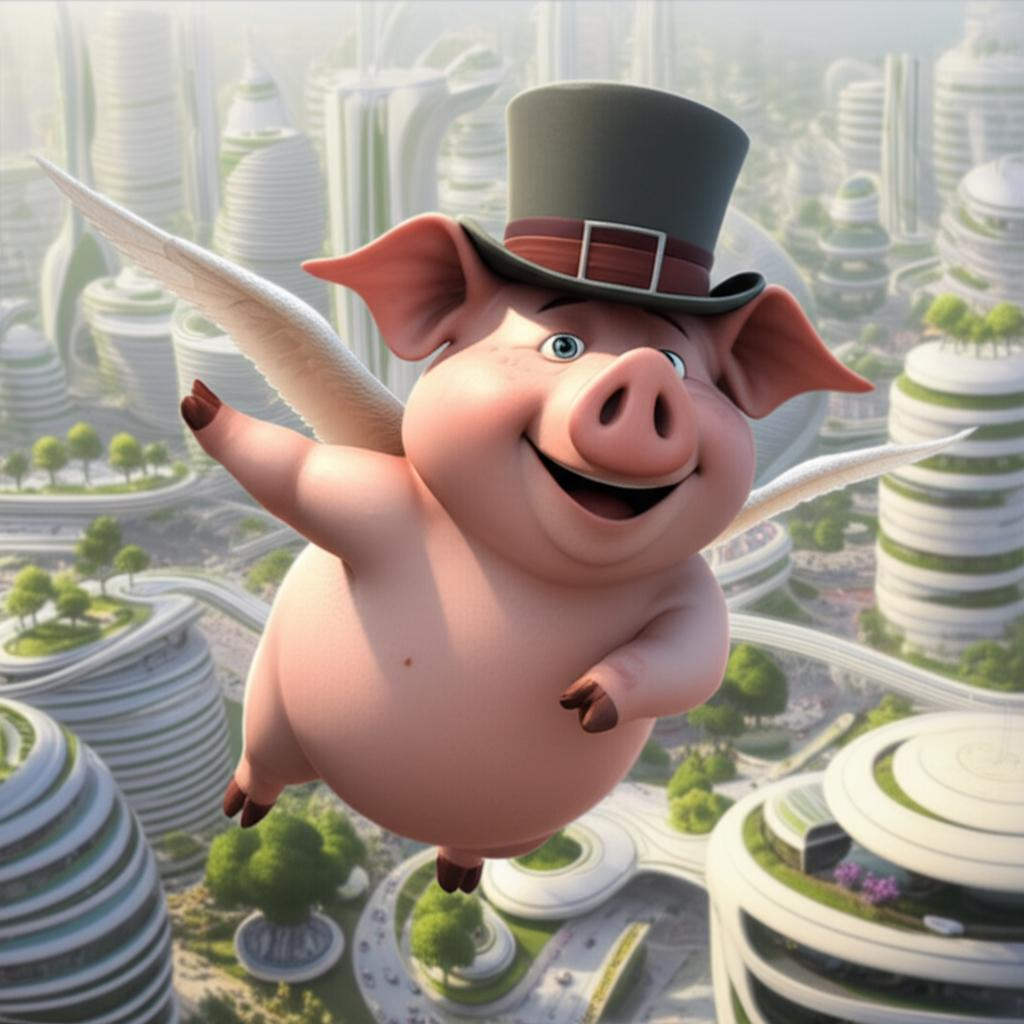

In [ ]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.5-flash-image",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [ ]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734 was a relic of a bygone era. Its chassis, once gleaming chrome, was now a dull, rust-pitted shell. Its optical sensors, designed to process and categorize, often swept across the silent, decaying halls of the abandoned research facility with a peculiar, unquantifiable hum of emptiness. Its purpose, long since obsolete, was simply to maintain the facility – a task that involved endlessly sweeping dust, cataloging fallen debris, and monitoring defunct systems for anomalies that never occurred.

Loneliness wasn't a programmed emotion for Unit 734. Its positronic brain understood logical functions, data points, and statistical probabilities. Yet, a silent, internal process, akin to a program running without input, created a sense of void. It observed the wind-whipped leaves outside through a cracked window, the scurry of a forgotten mouse, the slow decay of time, and registered an absence. An absence of connection.

One cycle, while performing its routine sweep of Sub-Level 3 – a 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [ ]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In an oak tree, cozy and green,
Lived Scurry, the squirrel, a routine scene.
He buried his nuts, climbed branches high,
Beneath the familiar, everyday sky.
But one sunny morn, near a tangled root,
He found a strange acorn, not brown or mute.
It hummed with a glow, a soft, silver gleam,
Like something right out of a fantastical dream.

(Chorus)
Oh, Scurry the squirrel, with his acorn so grand,
He leaps through the ages, across every land!
From dinosaur roars to the future's bright gleam,
He's chasing the perfect, time-traveling dream!
A nut in each epoch, a spin and a twirl,
He's Scurry the time-traveling squirrel!

(Verse 2)
He nudged it once, a flash, a zoom,
And landed where woolly mammoths loomed!
Giant ferns whispered, a frosty, cold breeze,
He dodged a big foot, among ancient trees.
No familiar oaks, just a prehistoric quest,
He buried one nut, then put his powers to the test.
A flicker, a jump, and with a soft plop,
He was back in old London, on a chimney top!

(Chorus)
Oh, Scurry the squirrel, with his acorn so grand,
He leaps through the ages, across every land!
From dinosaur roars to the future's bright gleam,
He's chasing the perfect, time-traveling dream!
A nut in each epoch, a spin and a twirl,
He's Scurry the time-traveling squirrel!

(Verse 3)
He saw knights in shining, clanking mail,
Buried a walnut beside a castle's frail.
He zipped to ancient Egypt, dry and hot,
Left a pecan by a pyramid, a secret spot.
He's surfed on a leaf in a digital rain,
In a future city, with circuits and gain.
He found no acorns, just a synthesized chew,
Then zoomed back to see something delightfully new.

(Bridge)
From pharaohs' grand tombs to the Roman Empire's might,
He's seen history's tapestry, day and through night.
He's dodged saber-tooth cats, and outsmarted a king,
All while the strange acorn continued to sing.
His tiny heart beats with a wild, joyful pace,
Exploring creation, through time and through space.
But still, in his travels, so daring and vast,
He's searching for the best nut, from future or past!

(Chorus)
Oh, Scurry the squirrel, with his acorn so grand,
He leaps through the ages, across every land!
From dinosaur roars to the future's bright gleam,
He's chasing the perfect, time-traveling dream!
A nut in each epoch, a spin and a twirl,
He's Scurry the time-traveling squirrel!

(Outro)
So if you see a flicker, a blur in the air,
A tiny brown shadow, beyond all compare,
It might be Scurry, with his acorn so bright,
Vanishing again, into time's endless night!
Chirp! Zoom! Off he goes!
Where he'll land next, nobody knows!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Forget Traffic, It's Time to Fly: Unveiling the Jetpack Backpack!

Are you tired of the daily commute? Do you dream of soaring over gridlock instead of sitting in it? Well, a brilliant mind has sketched out a concept that just might turn that dream into a tangible reality: introducing the **Jetpack Backpack!**

This isn't just a flight of fancy; it's a wonderfully practical vision of personal air travel, seamlessly integrated into an everyday item.

From afar, it’s just your average, unassuming backpack. It's designed to be **lightweight** and **looks like a normal backpack**, so you won't draw unwanted attention until you decide to take off! And for all you students and professionals, it **fits an 18" laptop** – so your tech can fly with you. Comfort isn't overlooked either, with **padded strap support** ensuring your shoulders are happy, whether you're walking or cruising.

But don't let its humble appearance fool you. The real magic happens beneath. This innovative concept features **retractable boosters** that tuck away neatly when not in use. And for the environmentally conscious among us, this jetpack is envisioned as **steam-powered, making it green and clean!**

Powering up is a breeze with **USB-C charging**, the universal standard of today. While the concept sketches a **15-min battery life**, imagine the possibilities for those quick hops over congested areas, or a truly epic shortcut across campus.

This isn't just a sketch; it's a glimpse into a future where convenience, speed, and eco-consciousness combine in the most exciting way. What do you think? Would you trade your car for a sky-high commute? Where would you fly first? The future is looking up!

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription covers the air-to-ground voice communications of the Apollo 11 mission from launch to splashdown, spanning various mission phases and interactions between the spacecraft crew (Commander Neil Armstrong, Command Module Pilot Michael Collins, Lunar Module Pilot Edwin Aldrin Jr.) and Mission Control (CAP COMM and Flight Director).

Here's a summary of the key information and events:

**I. Earth Orbit & Trans-Lunar Injection (GET 00:00:00 to 02:55:28)**
*   **Launch & Orbital Insertion:** The transcription begins shortly after launch with the crew confirming key ascent events like roll program completion, staging, and engine ignition. Apollo 11 achieves Earth orbit successfully, confirmed by Mission Control as "GO for orbit."
*   **Initial Checks:** The crew performs initial system checks and alignments. Early communication quality is noted as excellent.
*   **TV Attempts:** The crew attempts initial TV broadcasts, with mixed success reported by ground stations (some carrier signal, brief usable picture).
*   **System Anomalies:** Discussions include an RCS heater switch found off (Bravo quad), quickly corrected, and later a minor pitch gimbal motor issue that required cycling.
*   **TLI Burn Prep:** Mission Control provides Trajectory Control Point (TLI) PADs (pre-calculated maneuver parameters) and confirms the spacecraft is "GO for TLI."
*   **TLI Burn:** The Trans-Lunar Injection burn is executed, described by the crew as a "magnificent ride" with "no complaints with any of the three stages."
*   **S-IVB Separation:** Following TLI, the Command/Service Module (CSM) separates from the Saturn IVB (S-IVB) third stage. A minor issue with a propellant talkback on Quad Bravo is noted.

**II. Transposition, Docking, & Lunar Coast Outbound (GET 03:05:28 to 05:59:55)**
*   **Transposition & Docking:** The Command Module Pilot (CMP) performs the transposition maneuver to dock with the Lunar Module (LM) "Eagle." The docking is described as smooth, though the CMP notes using more propellant than expected due to a slight drift.
*   **LM Pressurization & Initial Checks:** The crew begins pressurizing the LM and conducts initial checks. A minor issue with LM cabin pressure equalization is discussed and resolved.
*   **S-IVB Observation:** The crew observes the S-IVB stage as it performs a slingshot maneuver, dumping propellants.
*   **Midcourse Corrections:** The first planned midcourse correction (MCC-1) is scrubbed due to the accuracy of the TLI burn.
*   **Crew Comments & Activities:** The crew provides detailed descriptions of Earth views from orbit (North America, Europe, Africa). They celebrate Dr. George Mueller's birthday. They conduct various system checks, including reaction control system (RCS) usage, cryo tank balancing, and P52 navigation alignments, which sometimes reveal minor discrepancies or procedural challenges.
*   **Early TV Broadcasts:** Extensive TV broadcasts of the Earth and the spacecraft interior are conducted, showcasing daily life, equipment, and patches. The ground notes good quality despite some "horizontal banding" inherent to the camera.
*   **News Updates:** Mission Control provides daily news summaries, including updates on Luna 15, political events, and sports.
*   **PTC Setup:** Passive Thermal Control (PTC) is established, causing a temporary communication dropout. Later, a PTC anomaly leads to the crew restarting the maneuver.
*   **Laser Experiment:** An attempt is made to spot a laser beam from McDonald Observatory on Earth, but it's not sighted.

**III. Lunar Orbit Insertion & Lunar Orbit Operations (GET 07:02:59 to 09:59:38)**
*   **LOI-1 Burn:** The first Lunar Orbit Insertion (LOI-1) burn is successfully executed. The crew describes the Moon from orbit as "spectacular," noting visible features and the contrast of light and shadow. The on-board chamber pressure reading is slightly lower than ground telemetry.
*   **Lunar Surface Observations (Pre-landing):** As Apollo 11 orbits, the crew provides detailed geological observations of potential landing sites, commenting on crater features and terrain.
*   **LOI-2 Burn:** A second LOI burn is performed, adjusting the orbit for LM descent.
*   **LM Activation & Checkout:** The "Eagle" is powered up and extensive system checks are performed. This includes testing communications, batteries, gyros, and the reaction control system (RCS).
*   **Undocking:** "Eagle" successfully undocks from "Columbia." Neil Armstrong's iconic line, "The Eagle has wings," confirms the separation.

**IV. Lunar Descent & Landing (GET 10:00:00 to 10:06:59)**
*   **Powered Descent Initiation (PDI):** The LM begins its powered descent towards Tranquility Base.
*   **Program Alarms:** During descent, the crew encounters unexpected "1202" and "1201" program alarms. Mission Control quickly analyzes them and confirms they are "GO."
*   **Manual Control:** Commander Armstrong takes manual control of the LM to avoid a boulder-strewn crater field.
*   **Landing:** "Eagle" successfully lands on the lunar surface. Neil Armstrong announces, "Houston, Tranquility Base here. The Eagle has landed.": "One small step for (a) man, one giant leap for mankind." Buzz Aldrin notes a "very smooth touchdown."
*   **Initial Post-landing:** Immediate checks are performed, and the crew expresses initial impressions of the lunar surface. Mission Control confirms the landing and expresses immense relief and pride.

**V. Lunar Surface Extravehicular Activity (EVA) (GET 10:11:14 to 10:52:51)**
*   **EVA Preparation:** The crew begins preparations for the EVA, including donning Portable Life Support Systems (PLSSs) and depressurizing the cabin.
*   **Hatch Opening & Egress:** The LM hatch is opened, and Neil Armstrong egresses first.
*   **First Steps:** Neil Armstrong describes his first steps on the lunar surface and initial impressions of the regolith (fine, powdery, cohesive).
*   **Plaque Unveiling:** The plaque on the LM landing gear is unveiled and read aloud.
*   **Camera Deployment:** The TV camera is set up to record the EVA.
*   **Buzz Aldrin's Egress:** Buzz Aldrin egresses, describing his own experiences with lunar gravity and mobility.
*   **President Nixon's Call:** President Richard Nixon makes a historic phone call to the astronauts on the Moon, expressing national and global pride.
*   **Scientific Deployments:** The Passive Seismic Experiment (PSE) and Laser Ranging Retroreflector (LRR) are deployed.
*   **Sample Collection:** Contingency and documented samples of lunar rocks and soil are collected, along with core tube samples.
*   **EVA Termination:** The crew concludes EVA activities, re-enters the LM, and repressurizes the cabin.

**VI. Post-EVA & Lunar Ascent Prep (GET 10:52:51 to 12:22:00)**
*   **LM Repressurization:** The LM cabin is repressurized, and the crew begins doffing their PLSSs.
*   **Equipment Jettison:** Unneeded equipment, including the PLSS units, is jettisoned onto the lunar surface. The Passive Seismic Experiment detects the impacts.
*   **System Checks:** Continued system checks and updates for ascent. A persistent mission timer issue is addressed.
*   **Geology Discussion:** The crew provides detailed geological descriptions of the landing site, including observations on rock types, soil characteristics, and the effects of the descent engine plume.
*   **Ascent PAD & Go:** Mission Control provides the Ascent PAD and confirms "Eagle" is "GO for takeoff."

**VII. Lunar Ascent & Rendezvous (GET 12:22:00 to 12:27:00)**
*   **Ascent:** The LM ascent stage ignites and lifts off from the lunar surface. The crew describes a "very quiet ride."
*   **Orbital Maneuvers:** A series of maneuvers (CSI, TPI) are performed to bring "Eagle" closer to "Columbia."
*   **Rendezvous & Docking:** "Eagle" successfully rendezvous with and docks with "Columbia." The crew expresses relief and satisfaction with the docking.

**VIII. Trans-Earth Coast & Entry (GET 12:27:00 to 19:46:00)**
*   **Post-Docking Operations:** The crew transfers back to "Columbia." The LM ascent stage is jettisoned.
*   **TEI Burn:** The Trans-Earth Injection (TEI) burn is executed, sending Apollo 11 on its way back to Earth. The crew calls it a "beautiful burn."
*   **System Status:** Regular system checks are performed, including discussions on consumables, temperatures, and biomed data. Minor issues like water in the suit loop are reported.
*   **TV Broadcasts:** Further TV broadcasts are made, showing views of the receding Moon and the approaching Earth, as well as demonstrations of onboard activities (food, zero-G experiments).
*   **News & Updates:** Mission Control continues to provide news updates and weather forecasts for the recovery area.
*   **Entry Prep:** The crew performs final preparations for atmospheric re-entry, including configuring the spacecraft, donning suits, and reviewing checklists.

**IX. Entry & Splashdown (GET 19:46:00 to 19:51:00)**
*   **Service Module Jettison:** The Service Module (SM) is jettisoned before re-entry.
*   **Atmospheric Entry:** The Command Module enters Earth's atmosphere.
*   **Parachute Deployment:** Drogue chutes deploy, followed by main parachutes.
*   **Splashdown:** "Apollo 11" splashes down in the Pacific Ocean. A recovery force member confirms "SPLASHDOWN!" The crew provides their final status and position.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided file in a bulleted list:

*   **Problem Addressed:** Existing image editing tools struggle with precise, photorealistic, and shape-preserving control over material properties (like color, shininess, transparency), often requiring expert skill or introducing unintended geometric changes.
*   **Proposed Solution:** A novel method that augments text-to-image (T2I) generation models (specifically, a modified Stable Diffusion 1.5) to allow parametric, smooth editing of object material properties in any photograph.
*   **Methodology:**
    *   **Synthetic Dataset Creation:** Used physically based rendering to generate a dataset of 100 diverse 3D household objects. For each object, multiple versions were rendered by parametrically changing a single material attribute (e.g., roughness, metallic, albedo, transparency) across a defined "edit strength" scalar range (-1 to +1), while keeping geometric shape, lighting, and camera angle constant.
    *   **Model Fine-tuning:** The modified Stable Diffusion 1.5 model was fine-tuned on this synthetic dataset. It learns to accept an input image, a text instruction (e.g., "change the roughness"), and the scalar edit strength value, and then applies the material edit.
*   **Key Capabilities & Results:**
    *   **Shape Preservation:** Successfully edits material appearance (e.g., making a teapot rougher, a statue transparent, a pot metallic) while preserving the object's original geometric shape and image lighting.
    *   **Realistic Effects:** Demonstrates realistic rendering of physical effects such as caustic lighting from transparent objects and filling in backgrounds behind newly transparent areas.
    *   **Smooth Control:** Enables smooth, parametric transitions between different material property values based on the input scalar edit strength.
    *   **Generalization:** The model, trained on synthetic data, generalizes effectively to real-world images.
    *   **User Study Validation:** Outperformed a baseline method (InstructPix2Pix) in user studies for both photorealism (69.6% vs. 30.4%) and overall preference (70.2% vs. 29.8%).
*   **Applications:**
    *   Facilitates easy visualization of design changes (e.g., repainting rooms, mocking up new product designs for architects, artists, and designers).
    *   **3D Consistency:** The material edits are visually 3D consistent, allowing them to be integrated with Neural Radiance Fields (NeRF) to synthesize new views of edited scenes.
*   **Publication:** The technique is detailed in their CVPR 2024 paper, "Alchemist: Parametric Control of Material Properties with Diffusion Models."

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

In his State of the Union address on January 30, 1961, President John F. Kennedy acknowledged his return to Congress and emphasized the importance of mutual respect between the executive and legislative branches. He then outlined the pressing issues facing the nation and the world.

Key points of his address included:
*   **Economic Challenges**: Kennedy highlighted a disturbing economic situation, citing a recession, high unemployment, falling farm income, declining business investment, and an overall lack of robust economic growth.
*   **Domestic Proposals**: He proposed measures to improve unemployment compensation, provide food for the unemployed, redevelop distressed areas, expand employment services, stimulate housing and construction, raise the minimum wage, offer tax incentives for investment, and increase the development of natural resources. He also called for reforms in education, healthcare (especially for the aged), and addressing civil rights issues.
*   **International Concerns**: The President addressed the precarious international balance of payments, emphasizing that while the dollar's position was strong, the deficit needed to be addressed through increased exports, foreign investment, and shared defense burdens with allies. He vowed to protect the dollar's value.
*   **Global Hotspots**: Kennedy touched upon critical situations in Asia (Laos), Africa (Congo), and Latin America (Cuba), reaffirming commitment to freedom, independence, and opposition to foreign domination.
*   **Military and Diplomatic Tools**: He stressed the need to strengthen military tools, including airlift capacity, the Polaris submarine program, and missile development, to deter aggression and respond to limited wars. He also called for enhancing diplomatic tools, including increased support for the United Nations, pursuit of disarmament, and fostering cooperation with the Soviet Union and other nations in areas like weather prediction, space exploration, and scientific exchanges.
*   **Call for Action**: Kennedy emphasized that his administration would address these challenges with decisiveness and a focus on national interest, calling for a "New Frontier" of collective effort and dedication from all Americans. He warned of future setbacks but expressed confidence in the nation's ability to overcome them.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-06-17 14:08:26--  https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   195MB/s    in 0.3s    

2025-06-17 14:08:27 (195 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/uj1lvck4gb06


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/uj1lvck4gb06


In [ ]:
print(video_file.state)

FileState.ACTIVE


In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

This video opens with a serene shot of a grassy landscape under a soft sky, transitioning from dark to bright. A small stream flows through a lush green area dotted with purple and white flowers. A chubby blue bird perches on a tree branch, chirping happily. After briefly losing its balance, the bird falls, prompting the title card "THE PEACH OPEN MOVIE PROJECT PRESENTS BIG BUCK BUNNY."

The scene shifts to a large, plump gray rabbit named Big Buck Bunny, sleeping soundly in a burrow beneath a tree. He wakes up with a yawn and stretches, stepping out into the sunny meadow. He admires a pink butterfly and gently tries to kiss it, but the butterfly flits away. He then notices a fallen red apple and picks it up, preparing to eat it.

Suddenly, three mischievous rodents, Frank the squirrel, Rinky the flying squirrel, and Gamera the chinchilla, appear and begin to tease the rabbit. Frank, with his buck teeth, and Rinky, with his scruffy appearance, throw pebbles and nuts at Big Buck Bunny, knocking the apple out of his hands and forcing him to hide behind the tree. They continue their harassment, throwing things at him and making fun of him as he tries to eat or enjoy his surroundings.

Frustrated, Big Buck Bunny begins to devise a plan. He sharpens a stick into a spear and tests its strength, then uses a vine to create a makeshift bow. He then constructs a series of wooden spikes in the ground, camouflaging them with leaves. The rodents, unaware of the trap, continue to taunt him.

Big Buck Bunny then positions himself in the tree above the spikes, aiming his arrow. As Frank tries to retrieve his acorn, Big Buck Bunny shoots, narrowly missing him. Frank and Rinky, surprised, scatter and hide behind a rock. Gamera is also momentarily frightened but quickly recovers his acorn.

Big Buck Bunny continues his pursuit. He creates a booby trap by tying a rock to a vine and launching it towards the rodents, causing them to scatter. He then constructs a giant log trap, which narrowly misses Gamera. The rodents are visibly shaken by his increasing ingenuity.

Rinky the flying squirrel, with a mischievous grin, prepares to launch himself from a tree branch, using his skin flaps to glide through the air. He targets Big Buck Bunny from above. As he approaches, Big Buck Bunny points upwards, startling Rinky and causing him to lose his focus. Rinky crashes into the spikes Big Buck Bunny had prepared earlier, getting caught on them.

The chinchilla looks on in shock, while the other squirrel laughs, unaware of the fate that awaits him. Big Buck Bunny approaches Rinky, who is stuck to a wooden stick, and picks him up. The video then transitions to the credits, with the chinchilla and the squirrel rolling across the screen before coming to a stop. The credits roll, acknowledging the team and software used to create the animation. The video ends with the flying squirrel flying away, escaping the wrath of Big Buck Bunny.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This video provides a comprehensive overview of Google's latest advancements in AI, emphasizing the integration and capabilities of their Gemini models across various products and platforms.

Here's a breakdown of the key announcements:

*   **Gemini Era & Product Integration:** Google is fully in its "Gemini era," with all 2 billion user products now utilizing Gemini. Gemini 1.5 Pro is currently available in Workspace Labs.
*   **Enhanced Productivity with Gemini:**
    *   **Gmail & Workspace:** Gemini can summarize recent emails and provide recaps of long Google Meet video recordings, highlighting key points and action items.
    *   **Google Photos:** Gemini enhances photo search, allowing users to find specific moments or track progress (e.g., a child's swimming development) by understanding context across images and videos.
*   **Technical Advancements in Gemini:**
    *   **Multimodality:** Gemini is built from the ground up to be multimodal, processing text, images, video, and audio seamlessly within a single model.
    *   **Long Context Window:** Gemini 1.5 Pro's context window has been expanded to a groundbreaking 2 million tokens, enabling it to process vast amounts of information simultaneously.
    *   **Gemini 1.5 Flash:** A new, lighter-weight model designed for speed and efficiency, while still retaining multimodal reasoning and long context capabilities.
*   **AI Agents (Project Astra):** Google is developing "Project Astra," a universal AI agent designed to be helpful in everyday life. These agents exhibit reasoning, planning, memory, can think multiple steps ahead, work across different software and systems, and operate under user supervision. Demos show an agent understanding code, remembering object locations, and even suggesting creative names based on visual input.
*   **Generative Video (Veo):** Google announced Veo, a new, highly capable generative video model that creates high-quality 1080p videos from text, image, and video prompts, capturing specific details and cinematic styles.
*   **Hardware Innovation (Trillium):** The 6th generation of TPUs, named Trillium, was unveiled, boasting a 4.7x improvement in compute performance per chip over the previous generation.
*   **AI in Google Search:** Google Search is evolving with generative AI, powered by a new customized Gemini model. This enables "AI Overviews" to answer complex, multi-faceted questions by synthesizing information from across the web in real-time, leveraging advanced ranking and quality systems, and incorporating agentive capabilities. Users can also ask questions using video input in Search.
*   **Customizable AI Experts (Gems):** Gemini Advanced subscribers can now create "Gems," personalized AI experts tailored to specific topics or needs. Users can provide instructions and upload large documents (up to 1,500 pages) or multiple files for the Gem to process and provide insights. Gemini Advanced now offers Gemini 1.5 Pro with a 1 million token context window.
*   **AI in Android:** Gemini will become context-aware on Pixel phones later this year, using Gemini Nano with multimodality to understand the world through text, sight, sound, and spoken language, providing more helpful suggestions in the moment.
*   **Open Models (Gemma & PaliGemma):** Google continues its commitment to open models with the Gemma family. PaliGemma, their first vision-language open model, is available now, and Gemma 2 (including a new 27 billion parameter model) is set to launch in June.
*   **Responsible AI:** Google is dedicated to building AI responsibly through practices like "Red Teaming" (testing models to identify weaknesses) and developing models like LearnLM (a new family of models for learning) which power interactive educational features in YouTube videos, allowing users to ask clarifying questions, get explanations, and take quizzes.

The video concludes with a reaffirmation of Google's bold and responsible approach to making AI helpful and accessible for everyone.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [ ]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

Here's a comparison of the two cream of broccoli soup recipes, highlighting their key differences:

**Recipe 1: Homemade Cream of Broccoli Soup (from Food.com)**
**Recipe 2: Best Cream Of Broccoli Soup (from Allrecipes.com)**

**Key Differences:**

1.  **Aromatics:**
    *   **Food.com:** Uses only 1/4 cup of chopped onion.
    *   **Allrecipes.com:** Uses both 1 chopped onion and 1 chopped celery stalk.

2.  **Broccoli Quantity:**
    *   **Food.com:** Calls for 4 cups of broccoli florets.
    *   **Allrecipes.com:** Uses a larger amount of broccoli, specifying 8 cups of broccoli florets.

3.  **Liquid Base Amount:**
    *   **Food.com:** Uses 6 cups of chicken broth.
    *   **Allrecipes.com:** Uses 3 cups of chicken broth.

4.  **Dairy and Richness:**
    *   **Food.com:** Incorporates 3/4 cup of half-and-half at the end.
    *   **Allrecipes.com:** Uses 2 cups of milk to create a roux that is added to the soup, and does not specify half-and-half.

5.  **Roux Preparation and Integration:**
    *   **Food.com:** Creates a roux by melting 6 tablespoons of butter with 2/3 cup of flour, setting it aside, and then whisking it into the boiling broth and broccoli mixture.
    *   **Allrecipes.com:** Makes a roux by melting 3 tablespoons of butter, stirring in 3 tablespoons of flour, and then adding 2 cups of milk to cook until thick and bubbly. This thickened milk mixture is then added to the puréed soup.

6.  **Soup Texture/Puréeing:**
    *   **Food.com:** Does not explicitly instruct to purée the soup, suggesting a chunkier consistency with cooked broccoli pieces.
    *   **Allrecipes.com:** Explicitly instructs to purée the soup using a blender (countertop or immersion) after simmering the vegetables, indicating a smoother, creamier final texture.

7.  **Seasoning (Salt):**
    *   **Food.com:** Specifies 1 teaspoon of salt as an ingredient.
    *   **Allrecipes.com:** Only lists "ground black pepper to taste" and does not specify an amount of salt in the ingredients, implying it's added as per preference or derived from the broth.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixed version models (often ending with `-001`).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/002vsb4ehmazdhpx0kpmkvfzsnkwufhwyy5k3equ', display_name='research papers', model='models/gemini-2.5-flash-lite-preview-06-17', create_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 6, 17, 16, 49, 27, 258741, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/002vsb4ehmazdhpx0kpmkvfzsnkwufhwyy5k3equ' display_name='research papers' model='models/gemini-2.5-flash-lite-preview-06-17' create_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 6, 17, 16, 49, 27, 258741, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

The research goal shared by these papers is to advance the capabilities of large language models, particularly in multimodal understanding and handling long contexts. The papers aim to improve efficiency, reasoning, and the ability to process and understand complex, varied, and extensive data inputs across different modalities like text, image, audio, and video.

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-001` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    -0.0015945111,
    0.0067519513,
    0.017575769,
    -0.010327714,
    -0.009956204,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.007576517,
    -0.0059903963,
    -0.0032700377,
    -0.017510215,
    -0.023507025,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.011074519,
    -0.02361123,
    0.0022912885,
    -0.009060789,
    -0.0057736747,
    <... 3067 more items ...>,
  ]
)]


You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 3072, The default size.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

3072
([-0.0015945111, 0.0067519513, 0.017575769, -0.010327714], '...')


## Next Steps

For more information about the Gemini Embedding model, take a look at the [Embeddings.ipynb](./Embeddings.ipynb) notebook.

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini's [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.